In [ ]:
#NOTE: Generative AI wrote most of this code
#The code written by hand are the data json convertions, tuning of the dementia score,
#and assigning an integer value to gender

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Data Displaying Making Prettier?
import json

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.metrics import precision_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os, zipfile

# CHANGE THESE IF NEEDED
# Data Paths
SHARED_ROOT = "/content/drive/Shared drives/ECS171 Group project 9"
TAB_DATA  = os.path.join(SHARED_ROOT, "PreProcessed_data", "filtered_tab_data.xlsx")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel(TAB_DATA, sheet_name='Sheet1')
output_json_file_path = 'output_data.json'
df.to_json(output_json_file_path, orient='records', indent=4)


with open(output_json_file_path, 'r') as f:
  dataJ = json.load(f)

for patient in dataJ:
  del patient["Patient ID"]
  del patient["Hand"]

def dementiaScore(score):
  if (float(score) > 0): return 1
  return 0
def genderScore(gender):
  if (gender == "F"): return 1
  return 0

for patient in dataJ:
  patient["M/F"] = genderScore(patient["M/F"])

targets = tuple(dementiaScore(patient["CDR"]) for patient in dataJ)

for patient in dataJ:
    del patient["CDR"]
    del patient["ASF"]
features = dataJ[0].keys()
df = pd.DataFrame(dataJ)
# df = pd.read_json('localization.json')

X = df[features] # Your features
y = pd.Series(targets) # Your target variable (0 or 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle = True)

print(X)
print("---")
print(y)


     M/F  Age  Educ  SES  MMSE  eTIV   nWBV
0      1   74     2    3    29  1344  0.743
1      1   55     4    1    29  1147  0.810
2      1   73     4    3    27  1454  0.708
3      0   74     5    2    30  1636  0.689
4      1   52     3    2    30  1321  0.827
..   ...  ...   ...  ...   ...   ...    ...
210    1   70     1    4    29  1295  0.748
211    1   73     3    2    23  1536  0.730
212    1   61     2    4    28  1354  0.825
213    0   61     5    2    30  1637  0.780
214    1   62     3    3    26  1372  0.766

[215 rows x 7 columns]
---
0      0
1      0
2      1
3      0
4      0
      ..
210    1
211    1
212    0
213    0
214    0
Length: 215, dtype: int64


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

X = df[features] # Your features
y = pd.Series(targets) # Your target variable (0 or 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = True)

model = LogisticRegression(solver='liblinear') # 'liblinear' is a good default solver for smaller datasets
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("accuracy = ", accuracy)



accuracy =  0.8


In [ ]:
# Un normalized
from sklearn.model_selection import cross_val_score

X = df[features] # Your features
y = pd.Series(targets) # Your target variable (0 or 1)
model = LogisticRegression(solver='liblinear') # 'liblinear' is a good default solver for smaller datasets
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Individual fold scores: {scores}")
print(f"Mean accuracy: {np.mean(scores):.2f}")
print(f"Standard deviation of accuracy: {np.std(scores):.2f}")


Individual fold scores: [0.79069767 0.79069767 0.81395349 0.69767442 0.86046512]
Mean accuracy: 0.79
Standard deviation of accuracy: 0.05


In [ ]:
# normalized

X = df[features] # Your features
y = pd.Series(targets) # Your target variable (0 or 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns.tolist(), index=X.index)
model = LogisticRegression(solver='liblinear') # 'liblinear' is a good default solver for smaller datasets
scores = cross_val_score(model, X_train_scaled, y, cv=5, scoring='accuracy')
print(f"Individual fold scores: {scores}")
print(f"Mean accuracy: {np.mean(scores):.2f}")
print(f"Standard deviation of accuracy: {np.std(scores):.2f}")





Individual fold scores: [0.86046512 0.81395349 0.88372093 0.74418605 0.86046512]
Mean accuracy: 0.83
Standard deviation of accuracy: 0.05


In [ ]:
X = df[features]
y = pd.Series(targets)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns.tolist(), index=X.index)

# Define multiple models to compare
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear'),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

print("Comparing Multiple Classification Models:")
print("="*50)

results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    results[name] = {
        'mean_accuracy': np.mean(scores),
        'std_accuracy': np.std(scores),
        'scores': scores
    }
    print(f"{name:20}: {np.mean(scores):.3f} ± {np.std(scores):.3f}")

Comparing Multiple Classification Models:
Logistic Regression : 0.833 ± 0.050
Gradient Boosting   : 0.809 ± 0.034
Random Forest       : 0.833 ± 0.040
SVM                 : 0.791 ± 0.039
Decision Tree       : 0.753 ± 0.041
K-Nearest Neighbors : 0.763 ± 0.040


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import numpy as np

# Your data
X = df[features]
y = pd.Series(targets)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define parameter grids optimized for small datasets
param_grids = {
    'Logistic Regression': {
        'model': LogisticRegression(solver='liblinear', random_state=42),
        'params': {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'penalty': ['l1', 'l2'],
            'class_weight': [None, 'balanced']
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 150],  # SMALLER range for small dataset
            'learning_rate': [0.01, 0.05, 0.1, 0.2],
            'max_depth': [2, 3, 4],  # SHALLOW trees for small data
            'min_samples_split': [5, 10, 20],  # LARGER values to prevent overfitting
            'min_samples_leaf': [3, 5, 10],
            'subsample': [0.8, 0.9, 1.0]  # Stochastic gradient boosting
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 150],  # SMALLER range
            'max_depth': [3, 5, 7, None],
            'min_samples_split': [5, 10, 15],
            'min_samples_leaf': [2, 4, 6],
            'max_features': ['sqrt', 'log2', 0.5, 0.8],  # More conservative
            'class_weight': [None, 'balanced']
        }
    },
    'SVM': {
        'model': SVC(random_state=42),
        'params': {
            'C': [0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto', 0.1, 0.01],
            'class_weight': [None, 'balanced']
        }
    }
}

print("TUNING MODELS FOR SMALL DATASET (n=216)")
print("="*60)

tuned_results = {}
for name, config in param_grids.items():
    print(f"\n🔧 Tuning {name}...")

    # Use fewer CV folds for small dataset to ensure enough training samples
    grid_search = GridSearchCV(
        config['model'],
        config['params'],
        cv=3,  # Fewer folds for small dataset
        scoring='accuracy',
        n_jobs=-1,
        error_score='raise'
    )

    grid_search.fit(X_scaled, y)

    tuned_results[name] = {
        'best_score': grid_search.best_score_,
        'best_params': grid_search.best_params_,
        'best_estimator': grid_search.best_estimator_
    }

    print(f"   Best score: {grid_search.best_score_:.3f}")
    print(f"   Best params: {grid_search.best_params_}")

# Compare tuned vs untuned
print("\n" + "="*60)
print("COMPARISON: TUNED vs UNTUNED MODELS")
print("="*60)

# Your original results for comparison
original_results = {
    'Logistic Regression': 0.833,
    'Gradient Boosting': 0.809,
    'Random Forest': 0.833,
    'SVM': 0.791
}

for name in tuned_results.keys():
    tuned_score = tuned_results[name]['best_score']
    original_score = original_results.get(name, 0)
    improvement = tuned_score - original_score

    print(f"{name:20}: {original_score:.3f} → {tuned_score:.3f} (Δ: {improvement:+.3f})")

TUNING MODELS FOR SMALL DATASET (n=216)

🔧 Tuning Logistic Regression...
   Best score: 0.842
   Best params: {'C': 0.1, 'class_weight': None, 'penalty': 'l1'}

🔧 Tuning Gradient Boosting...
   Best score: 0.860
   Best params: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 150, 'subsample': 0.8}

🔧 Tuning Random Forest...
   Best score: 0.851
   Best params: {'class_weight': None, 'max_depth': 5, 'max_features': 0.8, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 150}

🔧 Tuning SVM...
   Best score: 0.842
   Best params: {'C': 0.1, 'class_weight': None, 'gamma': 'scale', 'kernel': 'linear'}

COMPARISON: TUNED vs UNTUNED MODELS
Logistic Regression : 0.833 → 0.842 (Δ: +0.009)
Gradient Boosting   : 0.809 → 0.860 (Δ: +0.051)
Random Forest       : 0.833 → 0.851 (Δ: +0.018)
SVM                 : 0.791 → 0.842 (Δ: +0.051)


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 0.5, 1, 5, 10, 50, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_scaled, y)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV accuracy: {grid_search.best_score_:.3f}")

# FIX: Use the correct key name from your results dictionary
original_accuracy = results['Logistic Regression']['mean_accuracy']
improvement = grid_search.best_score_ - original_accuracy

print(f"Original accuracy: {original_accuracy:.3f}")
print(f"Improvement: {improvement:+.3f}")

results_df = pd.DataFrame(grid_search.cv_results_)
results_df.sort_values(by='mean_test_score', ascending=False, inplace=True)
top_n_results = results_df[['params', 'mean_test_score']].head(5)
print(top_n_results)


Best parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV accuracy: 0.847
Original accuracy: 0.833
Improvement: +0.014
                                              params  mean_test_score
0  {'C': 0.1, 'penalty': 'l1', 'solver': 'libline...         0.846512
1      {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}         0.846512
2  {'C': 0.1, 'penalty': 'l2', 'solver': 'libline...         0.837209
3      {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}         0.837209
4  {'C': 0.5, 'penalty': 'l1', 'solver': 'libline...         0.837209


In [ ]:
import numpy as np
import pandas as pd
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Your data
X = df[features]
y = pd.Series(targets)

# Initialize storage for coefficients across runs
n_runs = 150
feature_names = X.columns.tolist() if hasattr(X, 'columns') else [f"Feature_{i}" for i in range(X.shape[1])]

# Storage for results
all_coefficients = []
all_intercepts = []
all_accuracies = []

print(f"Running {n_runs} iterations with different shuffles...")
print("="*60)

for i in range(n_runs):
    # Different random state for each run
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, shuffle=True, random_state=i
    )
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names, index=X_train.index)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names, index=X_test.index)

    # Train model
    model = LogisticRegression(solver='liblinear')
    model.fit(X_train_scaled, y_train)

    # Predict and store results
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    all_coefficients.append(model.coef_[0])
    all_intercepts.append(model.intercept_[0])
    all_accuracies.append(accuracy)

    # Print running statistics every few iterations
    if (i + 1) % 2 == 0 or (i + 1) == n_runs:
        current_coefs = np.array(all_coefficients)
        current_mean = current_coefs.mean(axis=0)
        current_std = current_coefs.std(axis=0)

        # print(f"\nAfter {i+1} runs:")
        # print(f"Mean Accuracy: {np.mean(all_accuracies):.3f} (±{np.std(all_accuracies):.3f})")
        # print("Feature coefficient stability:")
        # for feature, mean_coef, std_coef in zip(feature_names, current_mean, current_std):
            # print(f"  {feature}: {mean_coef:7.4f} ± {std_coef:.4f}")

# Convert to arrays for easier analysis
all_coefficients = np.array(all_coefficients)
all_intercepts = np.array(all_intercepts)
all_accuracies = np.array(all_accuracies)

# Final statistics
final_mean_coef = all_coefficients.mean(axis=0)
final_std_coef = all_coefficients.std(axis=0)
final_mean_intercept = all_intercepts.mean()
final_std_intercept = all_intercepts.std()

print("\n" + "="*60)
print("FINAL RESULTS")
print("="*60)
print(f"Accuracy across {n_runs} runs: {all_accuracies.mean():.3f} ± {all_accuracies.std():.3f}")
print(f"Intercept: {final_mean_intercept:.4f} ± {final_std_intercept:.4f}")

# Create results dataframe
results_df = pd.DataFrame({
    'Feature': feature_names,
    'Mean_Coefficient': final_mean_coef,
    'Std_Coefficient': final_std_coef,
    'Coefficient_Range': final_std_coef * 2,  # Approx 95% CI range
    'Abs_Mean_Coefficient': np.abs(final_mean_coef),
    'CV_Stability': final_std_coef / np.abs(final_mean_coef)  # Coefficient of variation
})

# Sort by absolute importance
results_df = results_df.sort_values('Abs_Mean_Coefficient', ascending=False)

print("\nFeature Importance (sorted by stability):")
print(results_df.round(4))

Running 150 iterations with different shuffles...

FINAL RESULTS
Accuracy across 150 runs: 0.835 ± 0.038
Intercept: -0.3587 ± 0.1737

Feature Importance (sorted by stability):
  Feature  Mean_Coefficient  Std_Coefficient  Coefficient_Range  \
4    MMSE           -2.1333           0.1854             0.3708   
6    nWBV           -0.7784           0.1473             0.2946   
5    eTIV            0.2548           0.1541             0.3081   
3     SES            0.1420           0.1476             0.2952   
1     Age           -0.0660           0.1228             0.2457   
0     M/F           -0.0591           0.1536             0.3071   
2    Educ           -0.0406           0.1431             0.2862   

   Abs_Mean_Coefficient  CV_Stability  
4                2.1333        0.0869  
6                0.7784        0.1893  
5                0.2548        0.6045  
3                0.1420        1.0393  
1                0.0660        1.8607  
0                0.0591        2.5961  
2      

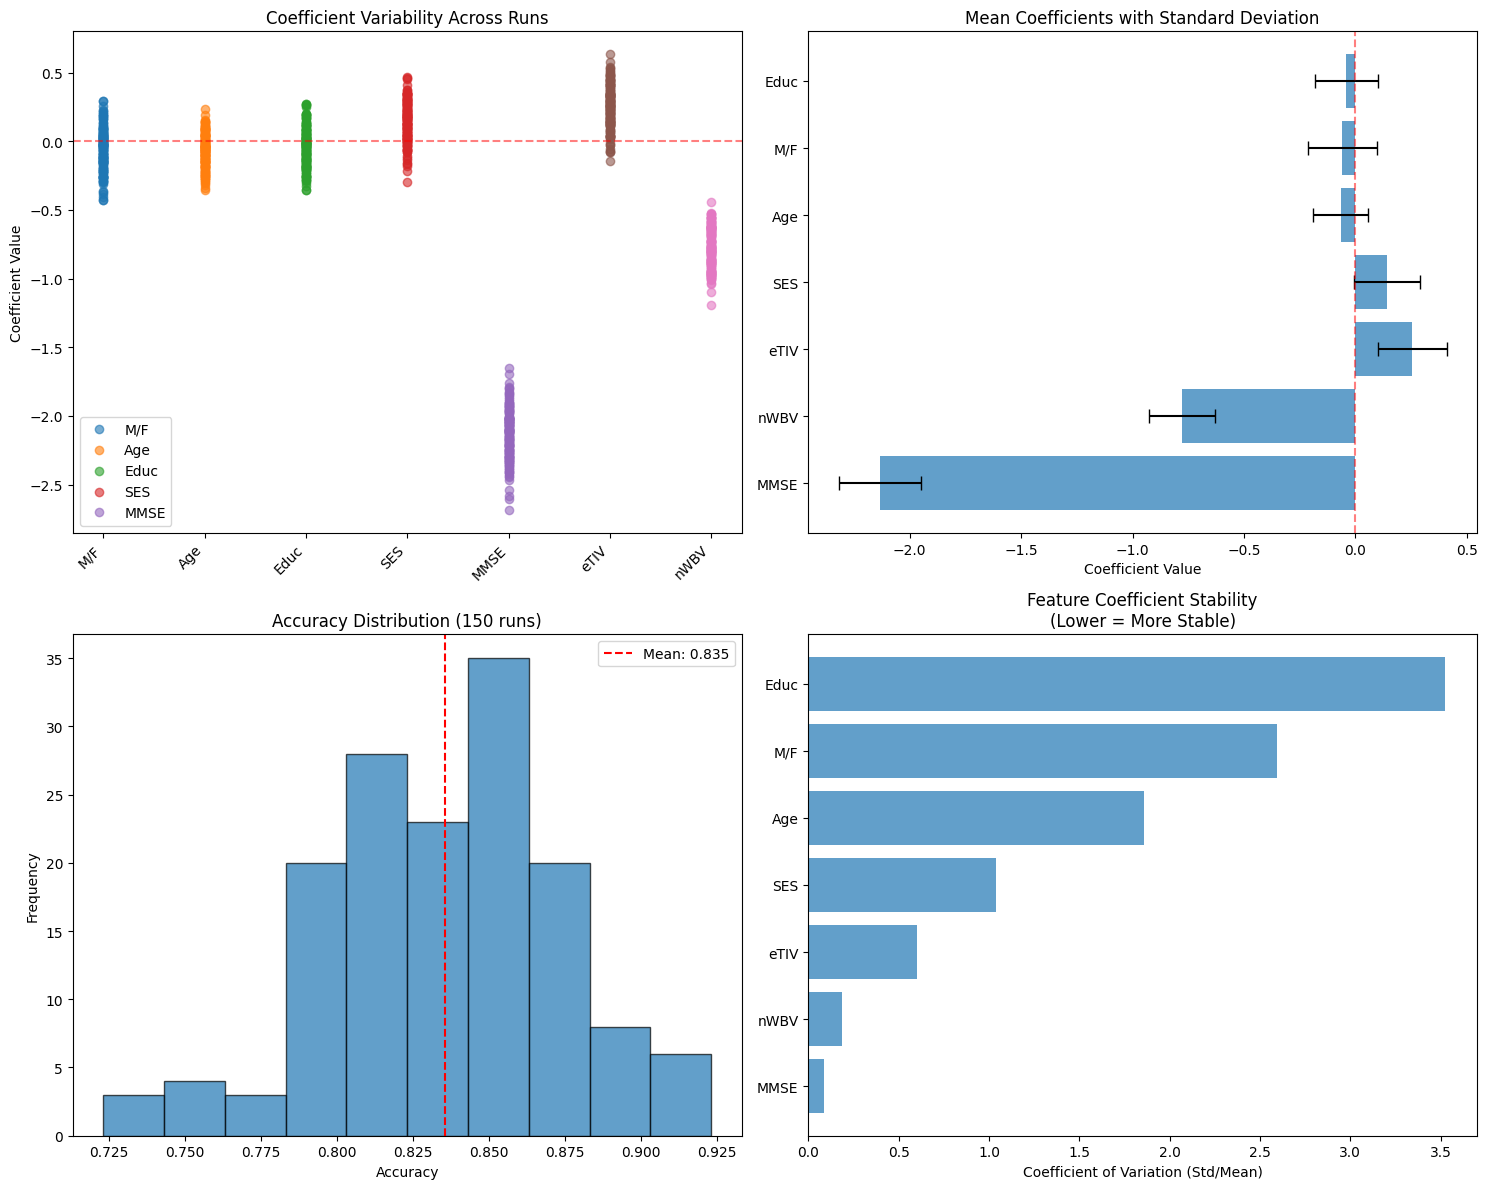

In [ ]:
# Create visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Coefficient distributions across runs
for i, feature in enumerate(feature_names):
    ax1.plot([i] * n_runs, all_coefficients[:, i], 'o', alpha=0.6, label=feature if i < 5 else "")

ax1.set_xticks(range(len(feature_names)))
ax1.set_xticklabels(feature_names, rotation=45, ha='right')
ax1.set_ylabel('Coefficient Value')
ax1.set_title('Coefficient Variability Across Runs')
ax1.axhline(y=0, color='red', linestyle='--', alpha=0.5)
if len(feature_names) <= 10:  # Only show legend if not too many features
    ax1.legend()

# Plot 2: Mean coefficients with error bars
ax2.barh(range(len(feature_names)), results_df['Mean_Coefficient'],
         xerr=results_df['Std_Coefficient'], capsize=5, alpha=0.7)
ax2.set_yticks(range(len(feature_names)))
ax2.set_yticklabels(results_df['Feature'])
ax2.set_xlabel('Coefficient Value')
ax2.set_title('Mean Coefficients with Standard Deviation')
ax2.axvline(x=0, color='red', linestyle='--', alpha=0.5)

# Plot 3: Accuracy distribution
ax3.hist(all_accuracies, bins=min(10, n_runs), alpha=0.7, edgecolor='black')
ax3.axvline(all_accuracies.mean(), color='red', linestyle='--', label=f'Mean: {all_accuracies.mean():.3f}')
ax3.set_xlabel('Accuracy')
ax3.set_ylabel('Frequency')
ax3.set_title(f'Accuracy Distribution ({n_runs} runs)')
ax3.legend()

# Plot 4: Coefficient stability (CV)
results_stable = results_df.sort_values('CV_Stability')
ax4.barh(range(len(feature_names)), results_stable['CV_Stability'], alpha=0.7)
ax4.set_yticks(range(len(feature_names)))
ax4.set_yticklabels(results_stable['Feature'])
ax4.set_xlabel('Coefficient of Variation (Std/Mean)')
ax4.set_title('Feature Coefficient Stability\n(Lower = More Stable)')

plt.tight_layout()
plt.show()


CONFUSION MATRIX AND DETAILED METRICS

Confusion Matrix:
[[39  5]
 [ 6 15]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        44
           1       0.75      0.71      0.73        21

    accuracy                           0.83        65
   macro avg       0.81      0.80      0.80        65
weighted avg       0.83      0.83      0.83        65


Detailed Metrics:
True Positives (TP): 15
True Negatives (TN): 39
False Positives (FP): 5
False Negatives (FN): 6
Precision: 0.750
Recall (Sensitivity): 0.714
Specificity: 0.886
F1-Score: 0.732


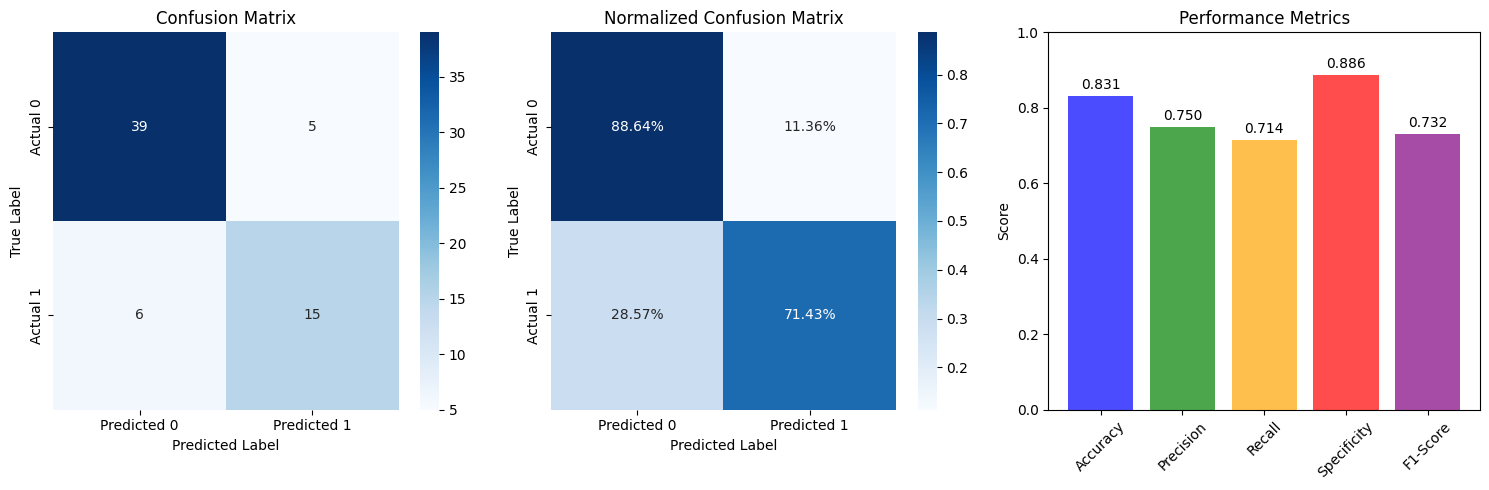

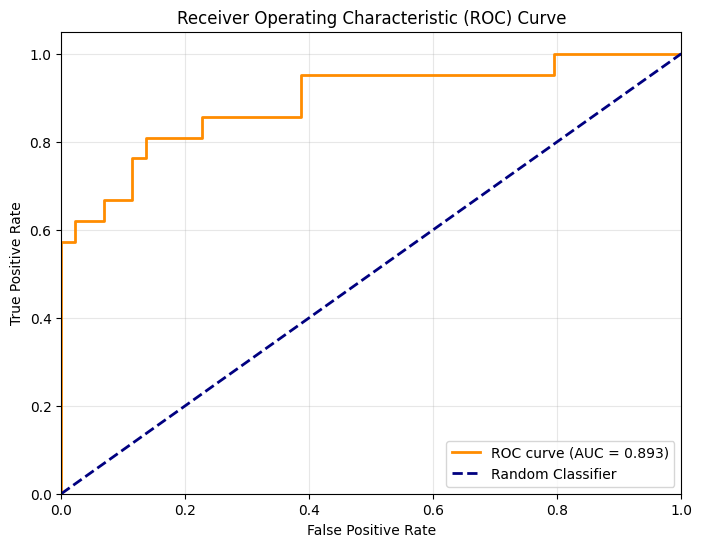


ROC AUC Score: 0.893


In [ ]:
# CONFUSION MATRIX AND ADDITIONAL METRICS
print("\n" + "="*50)
print("CONFUSION MATRIX AND DETAILED METRICS")
print("="*50)

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# 2. Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 3. Calculate additional metrics manually
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print("\nDetailed Metrics:")
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"Precision: {precision:.3f}")
print(f"Recall (Sensitivity): {recall:.3f}")
print(f"Specificity: {specificity:.3f}")
print(f"F1-Score: {f1:.3f}")

# 4. Visualize Confusion Matrix
plt.figure(figsize=(15, 5))

# Plot 1: Basic confusion matrix
plt.subplot(1, 3, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Plot 2: Normalized confusion matrix
plt.subplot(1, 3, 2)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Normalized Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Plot 3: Metrics comparison
plt.subplot(1, 3, 3)
metrics = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score']
values = [accuracy, precision, recall, specificity, f1]
colors = ['blue', 'green', 'orange', 'red', 'purple']

bars = plt.bar(metrics, values, color=colors, alpha=0.7)
plt.ylim(0, 1)
plt.title('Performance Metrics')
plt.xticks(rotation=45)
plt.ylabel('Score')

# Add value labels on bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 5. ROC Curve (for binary classification)
from sklearn.metrics import roc_curve, auc

if len(model.classes_) == 2:
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.show()

    print(f"\nROC AUC Score: {roc_auc:.3f}")

## Step 2: Experimenting with extended tbaular data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os, zipfile

# CHANGE THESE IF NEEDED
# Data Paths
SHARED_ROOT = "/content/drive/Shared drives/ECS171 Group project 9"
output_json_file_path  = os.path.join(SHARED_ROOT, "PreProcessed_data", "updated_tab_data.json")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# TAB_DATA  = "updated.xslx"
# df = pd.read_excel("updated.xslx")
# output_json_file_path = 'csvjson.json'
# df.to_json(output_json_file_path, orient='records', indent=4)


with open(output_json_file_path, 'r') as f:
  dataJ = json.load(f)

for patient in dataJ:
  del patient["Patient ID"]
  # del patient["Hand"]

def dementiaScore(score):
  if (float(score) > 0): return 1
  return 0
def genderScore(gender):
  if (gender == "F"): return 1
  return 0

for patient in dataJ:
  patient["M/F"] = genderScore(patient["M/F"])

targets = tuple(dementiaScore(patient["CDR"]) for patient in dataJ)

for patient in dataJ:
    del patient["CDR"]
    del patient["ASF"]

features = dataJ[0].keys()
df = pd.DataFrame(dataJ)
# df = pd.read_json('localization.json')

X = df[features] # Your features
y = pd.Series(targets) # Your target variable (0 or 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle = True)

print(X)
print("---")
print(y)


     M/F  Age  Educ  SES  MMSE  eTIV   nWBV    csf_ml     gm_ml     wm_ml  \
0      1   74     2    3    29  1344  0.743  428.1369  740.8402  498.3151   
1      1   55     4    1    29  1147  0.810  316.2809  810.7486  540.3586   
2      1   73     4    3    27  1454  0.708  486.1498  719.0866  462.0464   
3      0   74     5    2    30  1636  0.689  516.5773  651.1831  499.4894   
4      1   52     3    2    30  1321  0.827  287.8625  843.8092  535.7179   
..   ...  ...   ...  ...   ...   ...    ...       ...       ...       ...   
210    1   70     1    4    29  1295  0.748  419.1017  705.7688  542.4111   
211    1   73     3    2    23  1536  0.730  451.6505  656.4562  559.1743   
212    1   61     2    4    28  1354  0.825  290.8287  841.3154  535.2803   
213    0   61     5    2    30  1637  0.780  366.9363  820.7109  479.7363   
214    1   62     3    3    26  1372  0.766  391.2283  803.3281  472.8251   

      brain_ml  csf_ratio  gm_ratio  wm_ratio  gm_wm_ratio  
0    1239.1553

In [ ]:

X = df[features] # Your features
y = pd.Series(targets) # Your target variable (0 or 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = True)

model = LogisticRegression(solver='liblinear') # 'liblinear' is a good default solver for smaller datasets
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("accuracy = ", accuracy)



accuracy =  0.8615384615384616


In [ ]:
from sklearn.model_selection import cross_val_score

X = df[features] # Your features
y = pd.Series(targets) # Your target variable (0 or 1)
model = LogisticRegression(solver='liblinear') # 'liblinear' is a good default solver for smaller datasets
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Individual fold scores: {scores}")
print(f"Mean accuracy: {np.mean(scores):.2f}")
print(f"Standard deviation of accuracy: {np.std(scores):.2f}")



Individual fold scores: [0.88372093 0.79069767 0.90697674 0.69767442 0.8372093 ]
Mean accuracy: 0.82
Standard deviation of accuracy: 0.07


In [ ]:
# normalized

X = df[features] # Your features
y = pd.Series(targets) # Your target variable (0 or 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns.tolist(), index=X.index)
model = LogisticRegression(solver='saga') # 'liblinear' is a good default solver for smaller datasets
scores = cross_val_score(model, X_train_scaled, y, cv=5, scoring='accuracy')
print(f"Individual fold scores: {scores}")
print(f"Mean accuracy: {np.mean(scores):.2f}")
print(f"Standard deviation of accuracy: {np.std(scores):.2f}")



Individual fold scores: [0.86046512 0.79069767 0.90697674 0.69767442 0.86046512]
Mean accuracy: 0.82
Standard deviation of accuracy: 0.07


In [ ]:

X = df[features]
y = pd.Series(targets)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns.tolist(), index=X.index)

# Define multiple models to compare
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear'),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

print("Comparing Multiple Classification Models:")
print("="*50)

results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    results[name] = {
        'mean_accuracy': np.mean(scores),
        'std_accuracy': np.std(scores),
        'scores': scores
    }
    print(f"{name:20}: {np.mean(scores):.3f} ± {np.std(scores):.3f}")

Comparing Multiple Classification Models:
Logistic Regression : 0.823 ± 0.073
Gradient Boosting   : 0.795 ± 0.045
Random Forest       : 0.823 ± 0.028
SVM                 : 0.740 ± 0.045
Decision Tree       : 0.767 ± 0.049
K-Nearest Neighbors : 0.707 ± 0.048


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 0.5, 1, 5, 10, 50, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_scaled, y)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV accuracy: {grid_search.best_score_:.3f}")

# FIX: Use the correct key name from your results dictionary
original_accuracy = results['Logistic Regression']['mean_accuracy']
improvement = grid_search.best_score_ - original_accuracy

print(f"Original accuracy: {original_accuracy:.3f}")
print(f"Improvement: {improvement:+.3f}")

results_df = pd.DataFrame(grid_search.cv_results_)
results_df.sort_values(by='mean_test_score', ascending=False, inplace=True)
top_n_results = results_df[['params', 'mean_test_score']].head(5)
print(top_n_results)


Best parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV accuracy: 0.837
Original accuracy: 0.823
Improvement: +0.014
                                              params  mean_test_score
0  {'C': 0.1, 'penalty': 'l1', 'solver': 'libline...         0.837209
2  {'C': 0.1, 'penalty': 'l2', 'solver': 'libline...         0.832558
6  {'C': 0.5, 'penalty': 'l2', 'solver': 'libline...         0.832558
7      {'C': 0.5, 'penalty': 'l2', 'solver': 'saga'}         0.827907
4  {'C': 0.5, 'penalty': 'l1', 'solver': 'libline...         0.827907


In [ ]:
import numpy as np
import pandas as pd
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Your data
X = df[features]
y = pd.Series(targets)

# Initialize storage for coefficients across runs
n_runs = 150
feature_names = X.columns.tolist() if hasattr(X, 'columns') else [f"Feature_{i}" for i in range(X.shape[1])]

# Storage for results
all_coefficients = []
all_intercepts = []
all_accuracies = []

print(f"Running {n_runs} iterations with different shuffles...")
print("="*60)

for i in range(n_runs):
    # Different random state for each run
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, shuffle=True, random_state=i
    )
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names, index=X_train.index)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names, index=X_test.index)

    # Train model
    model = LogisticRegression(solver='liblinear')
    model.fit(X_train_scaled, y_train)

    # Predict and store results
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    all_coefficients.append(model.coef_[0])
    all_intercepts.append(model.intercept_[0])
    all_accuracies.append(accuracy)

    # Print running statistics every few iterations
    if (i + 1) % 2 == 0 or (i + 1) == n_runs:
        current_coefs = np.array(all_coefficients)
        current_mean = current_coefs.mean(axis=0)
        current_std = current_coefs.std(axis=0)

        # print(f"\nAfter {i+1} runs:")
        # print(f"Mean Accuracy: {np.mean(all_accuracies):.3f} (±{np.std(all_accuracies):.3f})")
        # print("Feature coefficient stability:")
        # for feature, mean_coef, std_coef in zip(feature_names, current_mean, current_std):
        #     print(f"  {feature}: {mean_coef:7.4f} ± {std_coef:.4f}")

# Convert to arrays for easier analysis
all_coefficients = np.array(all_coefficients)
all_intercepts = np.array(all_intercepts)
all_accuracies = np.array(all_accuracies)

# Final statistics
final_mean_coef = all_coefficients.mean(axis=0)
final_std_coef = all_coefficients.std(axis=0)
final_mean_intercept = all_intercepts.mean()
final_std_intercept = all_intercepts.std()

print("\n" + "="*60)
print("FINAL RESULTS")
print("="*60)
print(f"Accuracy across {n_runs} runs: {all_accuracies.mean():.3f} ± {all_accuracies.std():.3f}")
print(f"Intercept: {final_mean_intercept:.4f} ± {final_std_intercept:.4f}")

# Create results dataframe
results_df = pd.DataFrame({
    'Feature': feature_names,
    'Mean_Coefficient': final_mean_coef,
    'Std_Coefficient': final_std_coef,
    'Coefficient_Range': final_std_coef * 2,  # Approx 95% CI range
    'Abs_Mean_Coefficient': np.abs(final_mean_coef),
    'CV_Stability': final_std_coef / np.abs(final_mean_coef)  # Coefficient of variation
})

# Sort by absolute importance
results_df = results_df.sort_values('Abs_Mean_Coefficient', ascending=False)

print("\nFeature Importance (sorted by stability):")
print(results_df.round(4))

Running 150 iterations with different shuffles...

FINAL RESULTS
Accuracy across 150 runs: 0.833 ± 0.039
Intercept: -0.3660 ± 0.1782

Feature Importance (sorted by stability):
        Feature  Mean_Coefficient  Std_Coefficient  Coefficient_Range  \
4          MMSE           -2.1167           0.1962             0.3924   
8         gm_ml           -0.3320           0.0480             0.0960   
10     brain_ml           -0.2842           0.0320             0.0641   
7        csf_ml            0.2818           0.0322             0.0643   
6          nWBV           -0.2650           0.0589             0.1178   
5          eTIV            0.2476           0.1575             0.3150   
1           Age           -0.2319           0.1446             0.2891   
11    csf_ratio           -0.2164           0.1479             0.2958   
3           SES            0.1040           0.1527             0.3053   
2          Educ           -0.0779           0.1499             0.2998   
9         wm_ml      

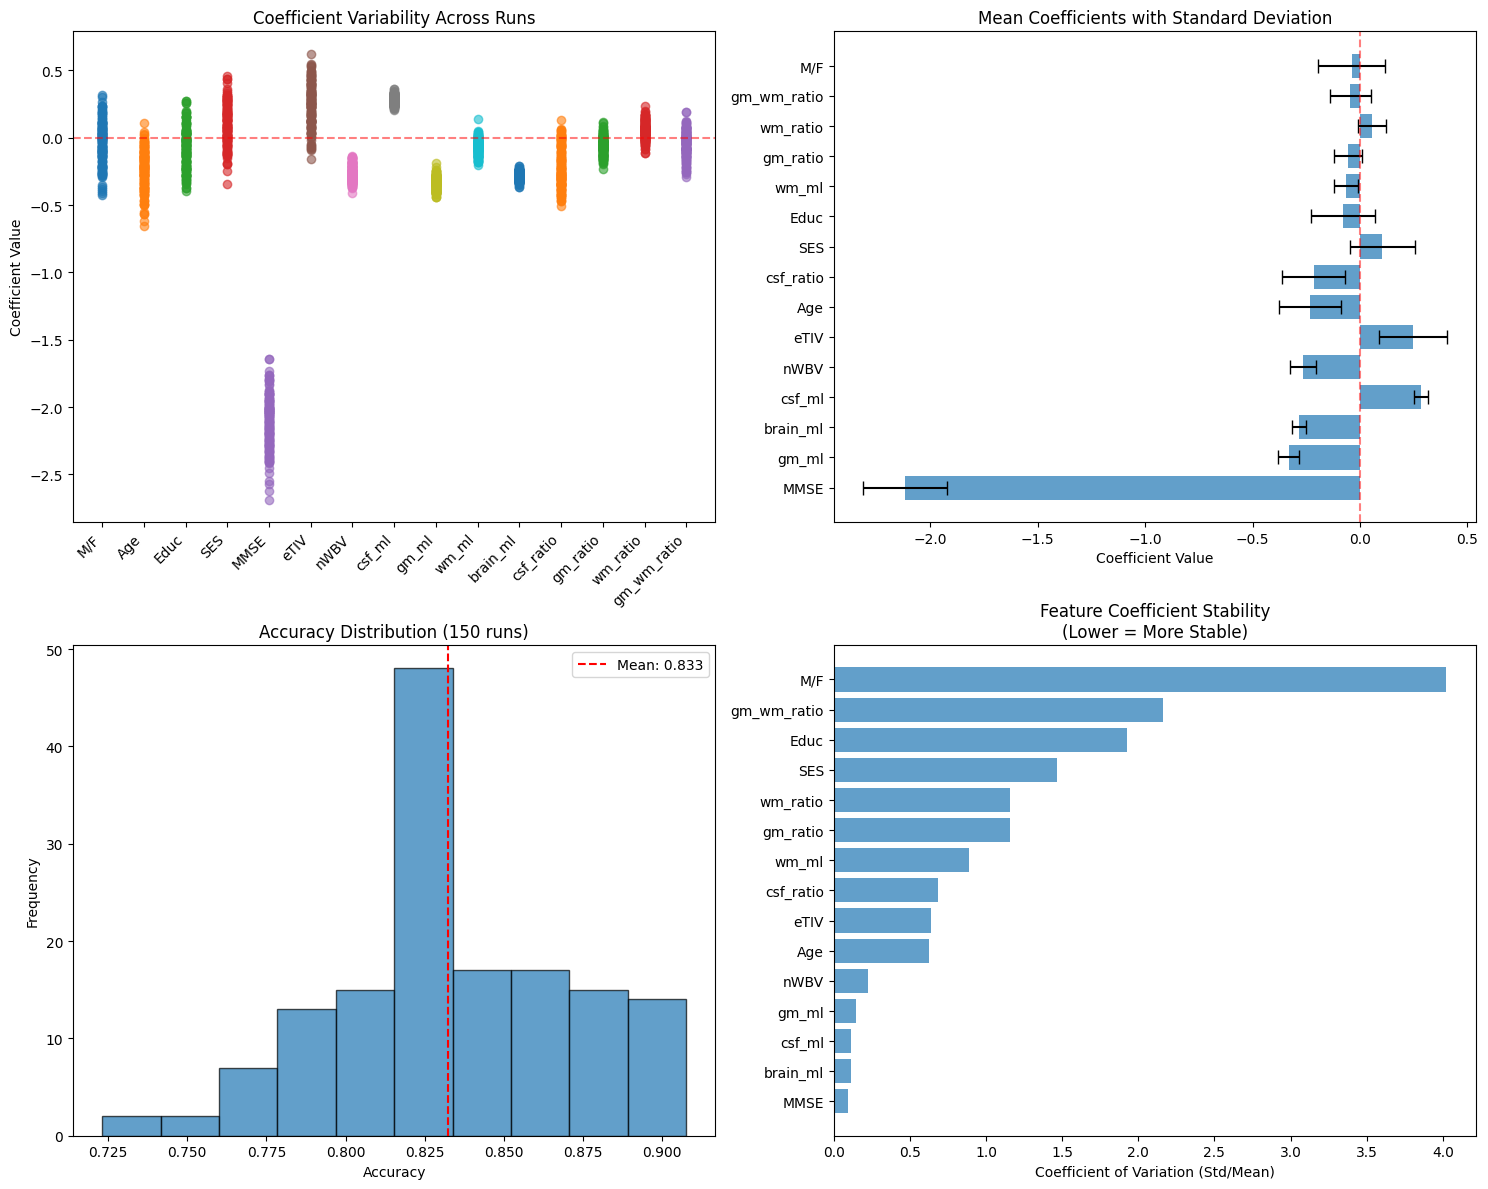

In [ ]:
# Create visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Coefficient distributions across runs
for i, feature in enumerate(feature_names):
    ax1.plot([i] * n_runs, all_coefficients[:, i], 'o', alpha=0.6, label=feature if i < 5 else "")

ax1.set_xticks(range(len(feature_names)))
ax1.set_xticklabels(feature_names, rotation=45, ha='right')
ax1.set_ylabel('Coefficient Value')
ax1.set_title('Coefficient Variability Across Runs')
ax1.axhline(y=0, color='red', linestyle='--', alpha=0.5)
if len(feature_names) <= 10:  # Only show legend if not too many features
    ax1.legend()

# Plot 2: Mean coefficients with error bars
ax2.barh(range(len(feature_names)), results_df['Mean_Coefficient'],
         xerr=results_df['Std_Coefficient'], capsize=5, alpha=0.7)
ax2.set_yticks(range(len(feature_names)))
ax2.set_yticklabels(results_df['Feature'])
ax2.set_xlabel('Coefficient Value')
ax2.set_title('Mean Coefficients with Standard Deviation')
ax2.axvline(x=0, color='red', linestyle='--', alpha=0.5)

# Plot 3: Accuracy distribution
ax3.hist(all_accuracies, bins=min(10, n_runs), alpha=0.7, edgecolor='black')
ax3.axvline(all_accuracies.mean(), color='red', linestyle='--', label=f'Mean: {all_accuracies.mean():.3f}')
ax3.set_xlabel('Accuracy')
ax3.set_ylabel('Frequency')
ax3.set_title(f'Accuracy Distribution ({n_runs} runs)')
ax3.legend()

# Plot 4: Coefficient stability (CV)
results_stable = results_df.sort_values('CV_Stability')
ax4.barh(range(len(feature_names)), results_stable['CV_Stability'], alpha=0.7)
ax4.set_yticks(range(len(feature_names)))
ax4.set_yticklabels(results_stable['Feature'])
ax4.set_xlabel('Coefficient of Variation (Std/Mean)')
ax4.set_title('Feature Coefficient Stability\n(Lower = More Stable)')

plt.tight_layout()
plt.show()


CONFUSION MATRIX AND DETAILED METRICS

Confusion Matrix:
[[40  4]
 [ 7 14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        44
           1       0.78      0.67      0.72        21

    accuracy                           0.83        65
   macro avg       0.81      0.79      0.80        65
weighted avg       0.83      0.83      0.83        65


Detailed Metrics:
True Positives (TP): 14
True Negatives (TN): 40
False Positives (FP): 4
False Negatives (FN): 7
Precision: 0.778
Recall (Sensitivity): 0.667
Specificity: 0.909
F1-Score: 0.718


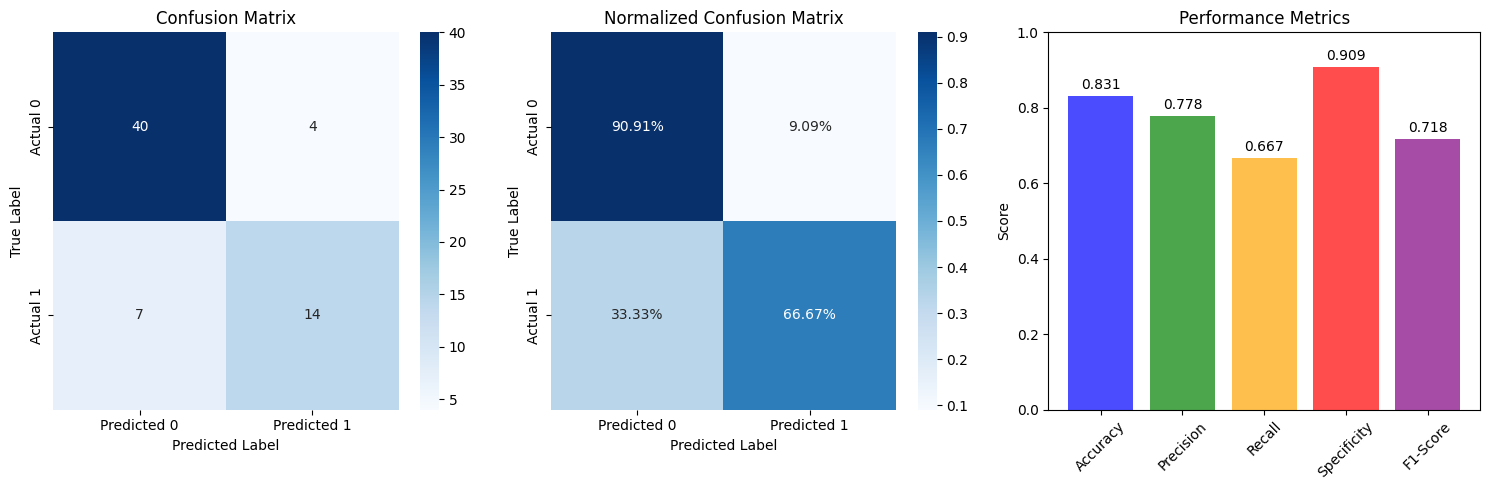

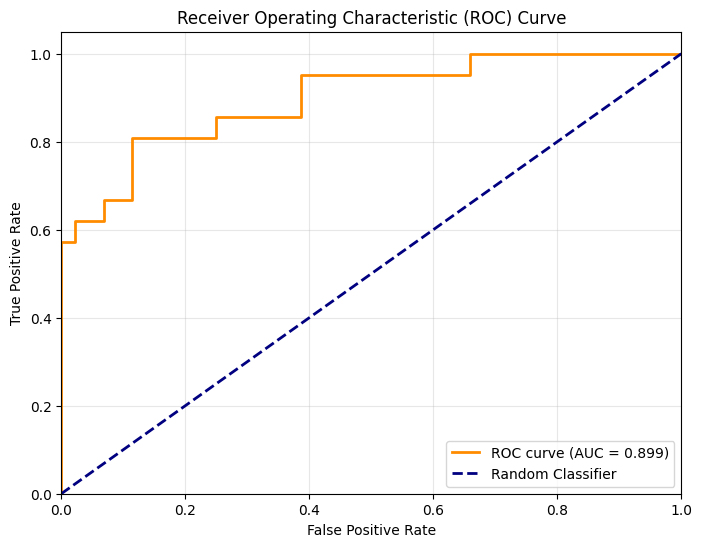


ROC AUC Score: 0.899


In [ ]:

# CONFUSION MATRIX AND ADDITIONAL METRICS
print("\n" + "="*50)
print("CONFUSION MATRIX AND DETAILED METRICS")
print("="*50)

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# 2. Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 3. Calculate additional metrics manually
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print("\nDetailed Metrics:")
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"Precision: {precision:.3f}")
print(f"Recall (Sensitivity): {recall:.3f}")
print(f"Specificity: {specificity:.3f}")
print(f"F1-Score: {f1:.3f}")

# 4. Visualize Confusion Matrix
plt.figure(figsize=(15, 5))

# Plot 1: Basic confusion matrix
plt.subplot(1, 3, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Plot 2: Normalized confusion matrix
plt.subplot(1, 3, 2)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Normalized Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Plot 3: Metrics comparison
plt.subplot(1, 3, 3)
metrics = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score']
values = [accuracy, precision, recall, specificity, f1]
colors = ['blue', 'green', 'orange', 'red', 'purple']

bars = plt.bar(metrics, values, color=colors, alpha=0.7)
plt.ylim(0, 1)
plt.title('Performance Metrics')
plt.xticks(rotation=45)
plt.ylabel('Score')

# Add value labels on bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 5. ROC Curve (for binary classification)
from sklearn.metrics import roc_curve, auc

if len(model.classes_) == 2:
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.show()

    print(f"\nROC AUC Score: {roc_auc:.3f}")

## 3. Experimenting with REMOVING features

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score

# Use your best performing model

X = df[features] # Your features
y = pd.Series(targets) # Your target variable (0 or 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns.tolist(), index=X.index)

# Can tweak this
best_model = LogisticRegression(solver='liblinear', C=1, penalty='l1')

# Try different numbers of features
feature_counts = range(3, len(feature_names) + 1)
rfe_results = {}

print("Recursive Feature Elimination:")
print("="*50)

for n_features in feature_counts:
    # Perform RFE
    rfe = RFE(estimator=best_model, n_features_to_select=n_features)
    rfe.fit(X_train_scaled, y)

    # Get selected features
    selected_features = X_train_scaled.columns[rfe.support_].tolist()

    # Evaluate with cross-validation
    scores = cross_val_score(best_model, X_train_scaled[selected_features], y, cv=5, scoring='accuracy')

    rfe_results[n_features] = {
        'mean_accuracy': np.mean(scores),
        'std_accuracy': np.std(scores),
        'selected_features': selected_features,
        'ranking': rfe.ranking_
    }

    print(f"Features: {n_features:2d} | Accuracy: {np.mean(scores):.3f} ± {np.std(scores):.3f}")

# Find optimal number of features
best_n = max(rfe_results, key=lambda x: rfe_results[x]['mean_accuracy'])
print(f"\n🎯 Optimal number of features: {best_n}")
print(f"Best accuracy: {rfe_results[best_n]['mean_accuracy']:.3f}")
print(f"Selected features: {rfe_results[best_n]['selected_features']}")

Recursive Feature Elimination:
Features:  3 | Accuracy: 0.847 ± 0.028
Features:  4 | Accuracy: 0.837 ± 0.044
Features:  5 | Accuracy: 0.837 ± 0.044
Features:  6 | Accuracy: 0.847 ± 0.041
Features:  7 | Accuracy: 0.847 ± 0.041
Features:  8 | Accuracy: 0.828 ± 0.065
Features:  9 | Accuracy: 0.828 ± 0.065
Features: 10 | Accuracy: 0.828 ± 0.065
Features: 11 | Accuracy: 0.828 ± 0.065
Features: 12 | Accuracy: 0.828 ± 0.065
Features: 13 | Accuracy: 0.828 ± 0.065
Features: 14 | Accuracy: 0.828 ± 0.065
Features: 15 | Accuracy: 0.828 ± 0.065

🎯 Optimal number of features: 3
Best accuracy: 0.847
Selected features: ['MMSE', 'csf_ml', 'gm_ml']


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

# Your current approach has DATA LEAKAGE!
# You're doing feature selection on the ENTIRE dataset before cross-validation
# This gives overly optimistic results

print("PROBLEM: Feature selection is done on entire dataset before CV!")
print("This causes data leakage and overfitting!")
print("="*60)

# CORRECT APPROACH: Feature selection inside cross-validation
def proper_rfe_cv(X, y, model, feature_counts):
    """
    Proper RFE with cross-validation (no data leakage)
    """
    from sklearn.model_selection import StratifiedKFold

    results = {}
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for n_features in feature_counts:
        fold_scores = []
        selected_features_per_fold = []

        for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
            # Split data for this fold
            X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
            y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

            # Scale data for this fold (important!)
            scaler_fold = StandardScaler()
            X_train_scaled = scaler_fold.fit_transform(X_train_fold)
            X_val_scaled = scaler_fold.transform(X_val_fold)

            # Convert back to DataFrame
            X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train_fold.index)
            X_val_scaled = pd.DataFrame(X_val_scaled, columns=X.columns, index=X_val_fold.index)

            # Perform RFE on training fold only
            rfe = RFE(estimator=model, n_features_to_select=n_features)
            rfe.fit(X_train_scaled, y_train_fold)

            # Get selected features
            selected_features = X.columns[rfe.support_].tolist()
            selected_features_per_fold.append(selected_features)

            # Evaluate on validation fold
            model_fold = LogisticRegression(solver='liblinear', C=1, penalty='l1')
            model_fold.fit(X_train_scaled[selected_features], y_train_fold)
            score = model_fold.score(X_val_scaled[selected_features], y_val_fold)
            fold_scores.append(score)

        results[n_features] = {
            'mean_accuracy': np.mean(fold_scores),
            'std_accuracy': np.std(fold_scores),
            'selected_features_per_fold': selected_features_per_fold,
            'fold_scores': fold_scores
        }

        print(f"Features: {n_features:2d} | Accuracy: {np.mean(fold_scores):.3f} ± {np.std(fold_scores):.3f}")

    return results

# Run the proper version
print("PROPER RFE WITH CROSS-VALIDATION:")
print("="*50)
best_model = LogisticRegression(solver='liblinear', C=1, penalty='l1')
proper_results = proper_rfe_cv(X, y, best_model, range(3, len(feature_names) + 1))

# Find optimal number of features
best_n_proper = max(proper_results, key=lambda x: proper_results[x]['mean_accuracy'])
print(f"\n🎯 Proper optimal number of features: {best_n_proper}")
print(f"Best accuracy: {proper_results[best_n_proper]['mean_accuracy']:.3f}")

# Check feature selection stability
print(f"\nFeature selection stability across folds:")
for n_features in [3, best_n_proper, len(feature_names)]:
    features_across_folds = proper_results[n_features]['selected_features_per_fold']
    # Count how often each feature was selected
    feature_counts = {}
    for fold_features in features_across_folds:
        for feature in fold_features:
            feature_counts[feature] = feature_counts.get(feature, 0) + 1

    print(f"\n{n_features} features - Selection frequency:")
    for feature, count in sorted(feature_counts.items(), key=lambda x: x[1], reverse=True):
        print(f"  {feature}: {count}/5 folds")

PROBLEM: Feature selection is done on entire dataset before CV!
This causes data leakage and overfitting!
PROPER RFE WITH CROSS-VALIDATION:
Features:  3 | Accuracy: 0.847 ± 0.032
Features:  4 | Accuracy: 0.828 ± 0.041
Features:  5 | Accuracy: 0.823 ± 0.035
Features:  6 | Accuracy: 0.833 ± 0.034
Features:  7 | Accuracy: 0.833 ± 0.034
Features:  8 | Accuracy: 0.833 ± 0.034
Features:  9 | Accuracy: 0.833 ± 0.034
Features: 10 | Accuracy: 0.833 ± 0.034
Features: 11 | Accuracy: 0.833 ± 0.034
Features: 12 | Accuracy: 0.833 ± 0.034
Features: 13 | Accuracy: 0.833 ± 0.034
Features: 14 | Accuracy: 0.833 ± 0.034
Features: 15 | Accuracy: 0.833 ± 0.034

🎯 Proper optimal number of features: 3
Best accuracy: 0.847

Feature selection stability across folds:

3 features - Selection frequency:
  MMSE: 5/5 folds
  gm_ml: 3/5 folds
  nWBV: 2/5 folds
  csf_ml: 2/5 folds
  Age: 2/5 folds
  eTIV: 1/5 folds

3 features - Selection frequency:
  MMSE: 5/5 folds
  gm_ml: 3/5 folds
  nWBV: 2/5 folds
  csf_ml: 2/5 